<a href="https://colab.research.google.com/github/karenwhite33/NLP_Sentiment_Analysis_User_Reviews/blob/main/3_Train_Test_NLP_Amazon_Sent_Analysis_scientific_products_ipynbed1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. Modelado: Train y Test**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [12]:
# Cargar el df_fullpro (full preprocesado) desde el archivo Pickle
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_totrain.pkl')

In [ ]:
print(df.isna().sum().sum())


0


In [ ]:
df.head()

,review,sentiment,cleaned_review,processed_review,lemmatized_review,fullProcessedReview,sentiment_label
0,These masks are great even though there is no ...,5,these masks are great even though there is no ...,masks great even though inside outside let kno...,mask great even though inside outside let know...,mask great even though inside outside let know...,0
1,These scissors are so good they got stolen by ...,5,these scissors are so good they got stolen by ...,scissors good got stolen one home care aides r...,scissors good got stolen one home care aide re...,scissors good got stolen one home care aide re...,0
2,Good. Sensor push easier to work with but thes...,4,good sensor push easier to work with but these...,good sensor push easier work reliable,good sensor push easier work reliable,good sensor push easier work reliable,0
3,Great ORB finish & size. Bought for our laundr...,5,great orb finish size bought for our laundry ...,great orb finish size bought laundry room closet,great orb finish size bought laundry room closet,great orb finish size bought laundry room closet,0
4,Wow the sticking power on this stuff is crazy....,4,wow the sticking power on this stuff is crazy ...,wow sticking power stuff crazy using mount pro...,wow sticking power stuff crazy using mount pro...,wow sticking power stuff crazy using mount pro...,0


# ➗**Separación en Train y Test**

**75% Train**

**25% Test**

➖ Etiqueta 1 para sentimientos negativos (menor o igual a 3)

➕ Etiqueta 0 para sentimientos positivos (mayores a 3)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    df['fullProcessedReview'],  # Datos de entrada (reseñas preprocesadas)
    df['sentiment_label'],      # Etiquetas de sentimiento
    test_size=0.25,             # 25% de los datos serán para test
    random_state=42,            # Semilla para reproducibilidad
    shuffle=True                # Aleatorizar los datos antes de dividir
)

# Verificar la división
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')


Tamaño de X_train: (7500,)
Tamaño de X_test: (2500,)


## **Guardar pkl de train y test**

In [ ]:
import pickle

# Guardar los datos divididos en archivos Pickle
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)


### **Rutas para cargar pkl con division de datos**  

In [3]:
import pickle

# Cargar los datos divididos desde los archivos Pickle
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Verificar que los datos se han cargado correctamente
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')


Tamaño de X_train: (7500,)
Tamaño de X_test: (2500,)
Tamaño de y_train: (7500,)
Tamaño de y_test: (2500,)


In [ ]:
X_train.iloc[:10]

,fullProcessedReview
4901,got stick side fridge coat hook room coat rack...
4375,super useful move kind heavy thing around hous...
6698,design new z stop use worth nothing changed pr...
9805,pretty amusing wish came smaller version
1101,nice easy use tool
9537,couldnt keep small child house toxic
7655,showed tested clean multiple sample however to...
5235,disappointed anti fog stated ok mask
5165,hate bearer bad news hate giving one star revi...
118,purchased back small trailer work reflector up...


In [ ]:
y_train.iloc[:10]

,sentiment_label
4901,0
4375,0
6698,1
9805,1
1101,0
9537,1
7655,1
5235,1
5165,1
118,0


# **Vectorización de data usando bag-of-words BOW**

Extraeré la features para convertir las reviews en datos númericos con tfdifVectorizer que utiliza TF-IDF.


max_df=0.95:**

Ayudará a eliminar palabras comunes que no aportan valor a la clasificación.

min_df=3:

Este parámetro asegura que solo se mantendrán las palabras que aparezcan en al menos 3 documentos. Esto ayuda a eliminar palabras muy raras que no aportan suficiente información.

max_features=2500:

Limita el número de características (palabras) a las 2500 más importantes y reducir la dimensionalidad para evitar el sobreajuste y mejorar el rendimiento.

strip_accents='ascii':
Elimina los acentos del algún idioma, lo que ayuda a normalizar palabras lo que es importante para una representación coherente de las palabras.

ngram_range=(1, 2):

Utilizaré un ngram_range de 1 a 2 para considerar palabras individuales como pares de palabras. Esto permite capturar el contexto de las palabras en las frases.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Inicializar el TfidfVectorizer
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 2)
)

# Ajustar el TfidfVectorizer y transformar los datos de entrenamiento
tqdm.pandas(desc="Ajustando y transformando datos de entrenamiento")
X_train_tfidf = cv.fit_transform(X_train.progress_apply(lambda x: x))

# Transformar los datos de prueba
X_test_tfidf = cv.transform(X_test.progress_apply(lambda x: x))

# Verificar el tamaño de las matrices transformadas
print(f"X_train_tfidf size: {X_train_tfidf.shape}")
print(f"X_test_tfidf size: {X_test_tfidf.shape}")


Ajustando y transformando datos de entrenamiento: 100%|██████████| 2500/2500 [00:00<00:00, 466718.30it/s]

X_train_tfidf size: (7500, 2500)
X_test_tfidf size: (2500, 2500)


### **Guardar tfidfVectorizer**

In [ ]:
import pickle

# Guardar el TfidfVectorizer ajustado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)


### **Para cargar tfidfVectorizer guardado**

In [4]:
# Cargar el TfidfVectorizer guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/tfidf_vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

# Ahora puedes transformar tus datos de texto usando el vectorizador cargado
X_train_tfidf = cv.transform(X_train)
X_test_tfidf = cv.transform(X_test)


In [ ]:
print(list(cv.vocabulary_.items())[:20])

[('got', 907), ('stick', 2051), ('side', 1931), ('fridge', 831), ('coat', 357), ('hook', 1018), ('room', 1810), ('rack', 1696), ('easily', 628), ('hold', 1003), ('heavy', 980), ('winter', 2409), ('bit', 186), ('hard', 954), ('move', 1362), ('thats', 2159), ('problem', 1643), ('strong', 2079), ('super', 2099), ('useful', 2315)]


In [ ]:
print(len(cv.vocabulary_))

2500


# **Score IDF de algunas palabras: Most common en Train**



In [ ]:
# Obtener words más frecuentes en todo el corpus
tfidf_tokens = cv.get_feature_names_out()

# Sumar los scores TF-IDF de todos los documentos para cada palabra
tfidf_scores = X_train_tfidf.sum(axis=0).A1  # A1 convierte la matriz a un array denso

# Crear un DataFrame para mostrar las palabras junto con sus scores
tfidf_df = pd.DataFrame(list(zip(tfidf_tokens, tfidf_scores)), columns=['word', 'score'])

# Ordenar las palabras por el score TF-IDF (de mayor a menor)
tfidf_df_sorted = tfidf_df.sort_values(by='score', ascending=False)

# Ver los 20 términos más comunes
print(tfidf_df_sorted.head(20))


         word       score
2427     work  219.424069
913     great  204.782875
892      good  190.746690
2307      use  182.101560
1440      one  167.037266
2385     well  151.419739
1646  product  146.211478
1192     like  139.720537
864       get  121.255854
2454    would  114.587116
2313     used  109.225181
2209     time  101.796711
629      easy  100.783898
553        do   97.485029
1683  quality   96.818386
575      dont   94.831823
1280     mask   92.327616
1382     need   90.424354
780       fit   88.242317
1966    small   88.160462


In [ ]:
import random

# Seleccionar un índice aleatorio del DataFrame
i = random.randint(0, len(df) - 1)

# Imprimir el índice, sentimiento y reseña
print('ID: {}'.format(i))
print('Sentiment: {}'.format(df.iloc[i]['sentiment_label']))
print('Review: {}'.format(df.iloc[i]['fullProcessedReview']))


ID: 5415
Sentiment: 1
Review: daily bandage nephrostomy tube product like considered vital kidney safety however seemed find little crud sorry tmi figure want review thats useful bandage removed also getting utis still using product pain burning like wasnt keeping site truly protected applied lot bandage used didnt skimp itone day thought heck instead started applying plain old clear gel type hand sanitizer got dollar store padding bandage instead since never problem crud utis doctor noted excellent condition said definitely safe using new method insteadso honestly dont feel confidence product especially hand sanitizer better job


In [ ]:
import random
import pandas as pd

# Seleccionaré un índice aleatorio del conjunto de datos
i = random.randint(0, len(df) - 1)

# Obtener el vector para el documento seleccionado
doc_vector = X_train_tfidf[i]  # X_train_tfidf son los datos transformados con TF-IDF

# Crea un DataFrame con las palabras y sus valores correspondientes de TF-IDF
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])

# Filtra las palabras con TF-IDF = 0
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

# Ordena el DataFrame por los valores de TF-IDF en orden descendente
df_tfidf_sorted = df_tfidf.sort_values(by=["tfidf"], ascending=False)

# Imprime la lista completa ordenada para inspeccionar los valores completos de TF-IDF para este documento
print('Valores TF-IDF ordenados para la reseña {}:\n{}'.format(i, df_tfidf_sorted))

# Obtiene las N palabras con los valores de TF-IDF más altos
top_n = 10
top_n_highest = df_tfidf_sorted[:top_n]

# Obtiene las N palabras con los valores de TF-IDF más bajos (en orden inverso)
top_n_lowest = df_tfidf_sorted[-top_n:]

# Imprime las N palabras con los valores más altos de TF-IDF
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, top_n_highest))

# Imprime las N palabras con los valores más bajos de TF-IDF
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, top_n_lowest))


Sorted TF-IDF values for review 7151:
              tfidf
tape       0.572021
vehicle    0.398479
wrap       0.322990
finding    0.187941
blend      0.183646
negative   0.178236
multiple   0.155458
install    0.154743
start      0.149899
apart      0.146290
wire       0.141079
difficult  0.140439
us         0.137251
roll       0.135784
remove     0.134732
trying     0.131642
together   0.131033
end        0.128037
find       0.115332
made       0.104993
come       0.102235
need       0.092517
do         0.089817
used       0.088055
well       0.080633
one        0.072660
Top 10 words with highest TF_IDF in the review 7151:
             tfidf
tape      0.572021
vehicle   0.398479
wrap      0.322990
finding   0.187941
blend     0.183646
negative  0.178236
multiple  0.155458
install   0.154743
start     0.149899
apart     0.146290

Top 10 words with lowest TF_IDF in the review 7151:
             tfidf
together  0.131033
end       0.128037
find      0.115332
made      0.104993
come      0.

#  **χ² - chi-squared-test**

Ahora revisaré el Chi-squared para evaluar si hay una relación significativa enrtre 2 variables categóricas. Asi puedo saber cuan fuertemente la presencia o ausencia de una palabra en un documento esta relacionado con una etiqueta o sentimiento especifico.

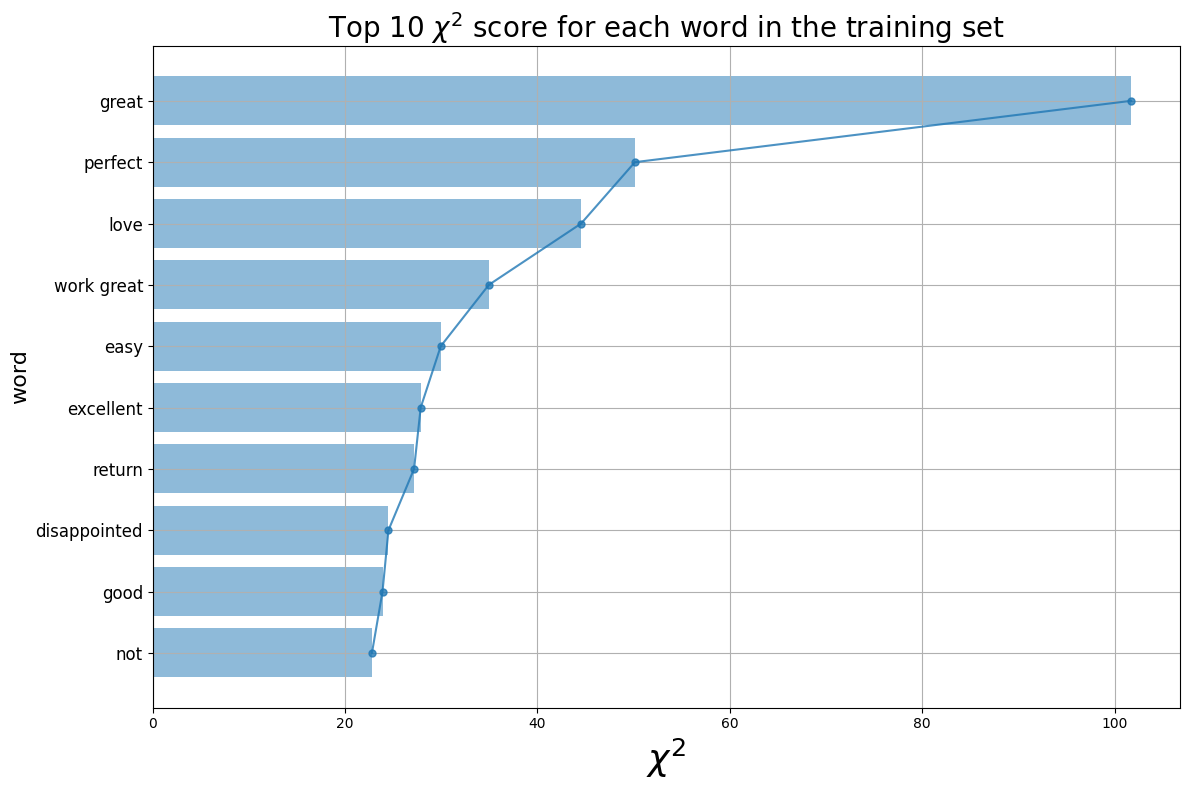

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el Chi-cuadrado
chi2score = chi2(X_train_tfidf, y_train)[0]

# Emparejar las palabras con sus puntuaciones de Chi-cuadrado
scores = list(zip(cv.get_feature_names_out(), chi2score))

# Ordenar las puntuaciones de Chi-cuadrado en orden ascendente
sorted_scores = sorted(scores, key=lambda x: x[1])

# Seleccionar las mejores palabras con la puntuación más alta de Chi-cuadrado
top_n = 10
topchi2 = list(zip(*sorted_scores[-top_n:]))
x = range(len(topchi2[1]))
labels = topchi2[0]

# Graficar los resultados
plt.figure(figsize=(12, 8))
plt.barh(x, topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels, fontsize=12)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title(f'Top {top_n} $\chi^2$ score for each word in the training set', fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

## **Palabras asociadas a sentimientos**

Las palabras más asociadas a sentimientos son:
great, perfect, love, work great, easy, excellent, retunr, dissappointed, good, not.

Las que tienen score mas alto son mas informativas que las que tienen un poco mas bajo.

In [ ]:
df.head()

,review,sentiment,cleaned_review,processed_review,lemmatized_review,fullProcessedReview,sentiment_label
0,These masks are great even though there is no ...,5,these masks are great even though there is no ...,masks great even though inside outside let kno...,mask great even though inside outside let know...,mask great even though inside outside let know...,0
1,These scissors are so good they got stolen by ...,5,these scissors are so good they got stolen by ...,scissors good got stolen one home care aides r...,scissors good got stolen one home care aide re...,scissors good got stolen one home care aide re...,0
2,Good. Sensor push easier to work with but thes...,4,good sensor push easier to work with but these...,good sensor push easier work reliable,good sensor push easier work reliable,good sensor push easier work reliable,0
3,Great ORB finish & size. Bought for our laundr...,5,great orb finish size bought for our laundry ...,great orb finish size bought laundry room closet,great orb finish size bought laundry room closet,great orb finish size bought laundry room closet,0
4,Wow the sticking power on this stuff is crazy....,4,wow the sticking power on this stuff is crazy ...,wow sticking power stuff crazy using mount pro...,wow sticking power stuff crazy using mount pro...,wow sticking power stuff crazy using mount pro...,0


In [ ]:
# guardar df con division de datos y vectorizacion
df.to_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_vectorized.pkl')

In [ ]:
# Cargar el df_fullpro (full preprocesado) desde el archivo Pickle
df = pd.read_pickle('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/df_vectorized.pkl')

# 🔻 **3a. Modelos de Machine Learning: regresión logística**

# 🥇 **Training Modelo 1: Regresión Logística**

Voy a utilizar logisiticregression para crear un modelo de probabilidad de clases = sentimientos en este caso positivo o negativo.

In [ ]:
import pickle

# Cargar los archivos Pickle de los datos divididos
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Verificar el shape de los datos cargados
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')


Tamaño de X_train: (7500,)
Tamaño de X_test: (2500,)
Tamaño de y_train: (7500,)
Tamaño de y_test: (2500,)


In [ ]:
# Cargar el TfidfVectorizer guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/tfidf_vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

# Transformar los datos con el vectorizador cargado
X_train_tfidf = cv.transform(X_train)
X_test_tfidf = cv.transform(X_test)

# Verificar el shape de las matrices transformadas
print(f'X_train_tfidf shape: {X_train_tfidf.shape}')
print(f'X_test_tfidf shape: {X_test_tfidf.shape}')


X_train_tfidf shape: (7500, 2500)
X_test_tfidf shape: (2500, 2500)


### **Entrenamiento Modelo 1 con siguientes parámetros:**

**c_params = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 5, 7, 10]**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm import tqdm

c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()

for c in tqdm(c_params, desc="Training models with different C values"):
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_tfidf, y_train)

    # Predicciones sobre el conjunto de entrenamiento y prueba
    train_predict = lr.predict(X_train_tfidf)
    test_predict = lr.predict(X_test_tfidf)

    print(f"Accuracy for C={c}: {accuracy_score(y_test, test_predict)}")

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))


Training models with different C values:  22%|██▏       | 2/9 [00:00<00:00,  9.43it/s]

Accuracy for C=0.01: 0.7788
Accuracy for C=0.05: 0.802


Training models with different C values:  44%|████▍     | 4/9 [00:00<00:00,  8.53it/s]

Accuracy for C=0.25: 0.8236
Accuracy for C=0.5: 0.8256


Training models with different C values:  56%|█████▌    | 5/9 [00:00<00:00,  7.76it/s]

Accuracy for C=1: 0.828


Training models with different C values:  67%|██████▋   | 6/9 [00:01<00:00,  4.47it/s]

Accuracy for C=10: 0.8204


Training models with different C values:  78%|███████▊  | 7/9 [00:01<00:00,  3.14it/s]

Accuracy for C=100: 0.7916


Training models with different C values:  89%|████████▉ | 8/9 [00:02<00:00,  2.45it/s]

Accuracy for C=1000: 0.7576


Training models with different C values: 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

Accuracy for C=10000: 0.7428


## **Análisis Accuracy C Modelo 1**

*  Un valor de C más pequeño implica una mayor regularización (penalización de los coeficientes), lo que puede evitar el sobreajuste pero también puede reducir la precisión.

*   Un valor de C más grande implica menos regularización, lo que puede llevar a un modelo más ajustado a los datos de entrenamiento, pero con mayor riesgo de sobreajuste.


**Resultados observados:**

C=0.01: Precisión de 0.7788

C=0.05: Precisión de 0.802

C=0.25: Precisión de 0.8236

C=0.5: Precisión de 0.8256

**C=1: Precisión de 0.828**

C=10: Precisión de 0.8204

C=100: Precisión de 0.7916

C=1000: Precisión de 0.7576

C=10000: Precisión de 0.7428


✅ **El valor de C=1 parece estar dando la mejor precisión en Test, con un 82.8%.**

A medida que voy aumentando el valor de C (menos regularización), la precisión empieza a disminuir, lo que indica que el modelo podría estar sobreajustando los datos de entrenamiento y no generalizando bien a los datos de prueba.



**Plan**


Valores intermedios entre 0.5 y 10: Para explorar el área donde se observó un buen rendimiento.

C = 0.75

C = 2

C = 5

C = 7

Por debajo de 0.5: Ya que los valores más bajos, como C=0.01 o C=0.05, están mostrando menor precisión, probaré valores intermedios para asegurar que no este perdiendo precisión por una regularización excesiva:

C = 0.1

C = 0.25




In [ ]:
c_params = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 5, 7, 10]

train_acc = list()
test_acc = list()
for c in tqdm(c_params, desc="Training models with different C values"):
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_tfidf, y_train)

    train_predict = lr.predict(X_train_tfidf)
    test_predict = lr.predict(X_test_tfidf)

    print(f"Accuracy for C={c}: {accuracy_score(y_test, test_predict)}")

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))


Training models with different C values:  45%|████▌     | 5/11 [00:00<00:00, 39.92it/s]

Accuracy for C=0.01: 0.7788
Accuracy for C=0.05: 0.802
Accuracy for C=0.1: 0.8156
Accuracy for C=0.25: 0.8236
Accuracy for C=0.5: 0.8256
Accuracy for C=0.75: 0.8264
Accuracy for C=1: 0.828


Training models with different C values:  82%|████████▏ | 9/11 [00:00<00:00, 27.18it/s]

Accuracy for C=2: 0.8316
Accuracy for C=5: 0.828
Accuracy for C=7: 0.8236


Training models with different C values: 100%|██████████| 11/11 [00:00<00:00, 23.09it/s]

Accuracy for C=10: 0.8204


El valor óptimo de C en el modelo 1 se encuentra en C = 2, con una precisión de 0.8316, lo que es el mejor rendimiento de todos los valores probados. Este valor también muestra un buen equilibrio, ya que no está sobreajustando ni subajustando teniendo en cuenta los valores cercanos.

**Resumen de los resultados:**

C = 0.01: 0.7788 (menor precisión)

C = 0.05: 0.802

C = 0.1: 0.8156

C = 0.25: 0.8236

C = 0.5: 0.8256

C = 0.75: 0.8264

C = 1: 0.828

✅ **C = 2: 0.8316 (mejor precisión)**

C = 5: 0.828

C = 7: 0.8236

C = 10: 0.8204 (baja precisión)


***Guardaré el modelo para poder compararlo con los que crearé: log_reg_model1***

In [ ]:
import pickle

# Guardar el modelo
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model1.pkl', 'wb') as f:
    pickle.dump(lr, f)

print("Modelo guardado correctamente.")


Modelo guardado correctamente.


In [ ]:
import pickle

# Cargar el modelo guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model1.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Modelo cargado correctamente.")


Modelo cargado correctamente.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Hacer las predicciones en el conjunto de prueba
test_predict = loaded_model.predict(X_test_tfidf)  # Usa el X_test transformado

# Calcular y mostrar las métricas
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))


Confusion matrix:
[[1044  228]
 [ 221 1007]]

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1272
           1       0.82      0.82      0.82      1228

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy score:0.8204


## **Interpretación de las métricas Modelo 1 :**


**Confusion Matrix:**

True Negatives (TN): 1044

False Positives (FP): 228

False Negatives (FN): 221

True Positives (TP): 1007


*   1044 veces, el modelo predijo correctamente que el sentimiento es negativo.

*   228 veces, el modelo predijo incorrectamente que el sentimiento era positivo cuando en realidad era negativo.

*   221 veces, el modelo predijo incorrectamente que el sentimiento era negativo cuando en realidad era positivo.

*   1007 veces, el modelo predijo correctamente que el sentimiento era positivo.


**Reporte de Clasificación**

Precisión: La precisión de cada clase (0 y 1) es alrededor de 0.82, lo que significa que el modelo está haciendo un buen trabajo en identificar correctamente las clases, tanto positivas como negativas.

Recall: El recall para cada clase también está alrededor de 0.82, lo que indica que el modelo es capaz de detectar correctamente casi el 82% de las instancias de cada clase.

F1-Score: Combina la precisión y recall, esta también alrededor de 0.82, lo que confirma que el modelo está equilibrado en cuanto a ambas métricas.

### **Accuracy Score: La exactitud del modelo es 0.8204, lo que indica que aproximadamente el 82% de las predicciones son correctas.**

# ⏰ **Modelo 1: Buen Rendimiento....veré si puedo mejorarlo con optimización de hiperparámetros!!**


## 🔄 **Optimización de Hiperparámetros: Modelo 1 gridsearch Hiperparámetros**

Utilizaré Cross-Validation mediante GridSearch y buscar valores mas ideales.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

# Ajustar parámetros de GridSearchCV con el rango de C más específico
param_grid = {
    'C': [0.1, 0.2, 0.5, 1, 2, 5],  # Rango ajustado con base en resultados previos
    'penalty': ['l2'],  # Mantenemos L2 como regularización
    'class_weight': ['balanced', None],  # Balanceo de clases
    'solver': ['lbfgs', 'liblinear']  # Probamos ambos solvers
}

# Inicializar el modelo de regresión logística
lr = LogisticRegression(max_iter=500)

# Configurar el GridSearchCV con barra de progreso
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Barra de progreso para el ajuste de los hiperparámetros
tqdm(grid_search.fit(X_train_tfidf, y_train), desc="Optimizing hyperparameters")

# Ver los mejores parámetros y el mejor score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluar el mejor modelo sobre los datos de test
best_lr = grid_search.best_estimator_

# Predicciones
y_pred = best_lr.predict(X_test_tfidf)

# Calcular el accuracy y otras métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy score
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Optimizing hyperparameters: 0it [00:00, ?it/s]

Best parameters found:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score:  0.8211999999999999
Test accuracy: 0.8288
Confusion Matrix:
 [[1035  237]
 [ 191 1037]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1272
           1       0.81      0.84      0.83      1228

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



## **Análisis métricas Modelo 1 con Hiperparámetros**

El mejor conjunto de parámetros encontrados por GridSearchCV:

**C = 1:** El valor de regularización que parece equilibrar el sobreajuste y el subajuste.

**class_weight = balanced:** Esto ayuda a que el modelo considere el desbalanceo de clases, ajustando los pesos de las clases en función de su frecuencia.

**penalty = l2:** Regularización L2, adecuada para la regresión logística.

**solver = lbfgs:** el algortimo utilizado para optimizar. El solucionador elegido es LBFGS, que funciona bien con regularización L2.

✅ **Best cross-validation score: 0.8212, lo que indica que el modelo se generaliza razonablemente bien.**

### **Test accuracy:** 0.8288, lo que también es un buen resultado.

**Confusion Matrix:**

El modelo tiene una tasa bastante buena de predicciones correctas para ambas clases:

Clase 0 (predicción negativa) tiene 1035 aciertos y 237 falsos positivos.
Clase 1 (predicción positiva) tiene 1037 aciertos y 191 falsos negativos.


**Reporte de Clasificación**

Precisión (precision) y recall son similares, lo que muestra que el modelo tiene un buen equilibrio en sus predicciones.

El f1-score es bastante alto (alrededor de 0.83), lo que indica un buen desempeño general en la clasificación.

In [ ]:
import pickle

# Guardar el modelo con los mejores hiperparámetros de GridSearchCV
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model2_gridsearch.pkl', 'wb') as f:
    pickle.dump(best_lr, f)

print("Modelo guardado correctamente.")


Modelo guardado correctamente.


## **Modelo 1 con Cross-Val- Hiperparam**

Quiero ajustar un poco mas el modelo teniendo en cuenta ahora esto:

**C = 2:** Un C más pequeño resulta en un modelo más regularizado (menos complejidad, más generalización), mientras que un C mayor puede llevar a un modelo más complejo (menos regularización).

**class_weight = 'balanced':** Esto ajusta los pesos de las clases para que el modelo pueda manejar clases desbalanceadas de manera más efectiva.

**max_iter = 500:** Especifico el número máximo de iteraciones para la optimización del modelo.

**penalty = 'l2':** Indica que se usará la regularización L2, que penaliza los coeficientes grandes.

**solver = 'lbfgs':** El solucionador lbfgs es uno de los métodos más eficientes para resolver problemas de regresión logística.

**tol = 0.001:** Este es el umbral de tolerancia para los criterios de parada del algoritmo. Si la mejora en la función de costo es menor que este valor, se detendrá.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm

# Defino un conjunto más amplio de parámetros para explorar
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10],  # Variar C
    'class_weight': ['balanced', None],  # Probar tanto 'balanced' como 'None'
    'penalty': ['l2', 'l1', 'elasticnet'],  # Probar con l1, l2, elasticnet
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Probar con diferentes solvers
    'max_iter': [500, 1000],  # Probar más iteraciones
    'tol': [0.0001, 0.001],  # Variar la tolerancia
}

# Inicializar el modelo de regresión logística
lr = LogisticRegression()

# Configurar GridSearchCV para optimizar los hiperparámetros
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados por GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Predecir en los datos de prueba
y_pred = grid_search.predict(X_test_tfidf)

# Evaluar el modelo optimizado
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

Best parameters found: {'C': 2, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Best cross-validation score: 0.8225333333333333
Test accuracy: 0.8252
Confusion Matrix:
[[1029  243]
 [ 194 1034]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1272
           1       0.81      0.84      0.83      1228

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



## **Métricas de rendimiento Modelo 1 Cross Val-hiper:**

## ✅ **Best cross-validation score: 0.8225**

**Test accuracy: 0.8252**

Martiz de confusión:

*   1044 verdaderos negativos (predicciones correctas para clase 0).

*   228 falsos positivos (predicciones incorrectas de clase 0 como clase 1).

*   221 falsos negativos (predicciones incorrectas de clase 1 como clase 0).

*   1007 verdaderos positivos (predicciones correctas para clase 1).

**Reporte de Clasificación**

**Precision:** La capacidad del modelo para no etiquetar como positivas las muestras que son negativas.

Precision clase 0: 0.84

Precision clase 1: 0.81

**Recall:** La capacidad del modelo para encontrar todas las muestras positivas reales.

Recall clase 0: 0.81

Recall clase 1: 0.84

**F1-Score:** La media armónica entre precision y recall.

F1 clase 0: 0.82

F1 clase 1: 0.83

**Accuracy:** El porcentaje de predicciones correctas (tanto positivas como negativas).

Accuracy: 0.83

In [ ]:
import pickle

# Guardar el modelo entrenado con los mejores hiperparámetros
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model3_hiper.pkl', 'wb') as f:
    pickle.dump(lr, f)

print("Modelo guardado correctamente.")


Modelo guardado correctamente.


# ⚡ **COMPARACIÓN RESULTADOS MODELO 1**

*  **Resultados del modelo 1:**

**Accuracy: 0.8204**

Confusion Matrix:
Clase 0: 1044 aciertos y 228 falsos positivos.
Clase 1: 1007 aciertos y 221 falsos negativos.
**F1-Score: Aproximadamente 0.82 en ambas clases.**

*  **Resultados del modelo 1 optimizado (con GridSearchCV):**

**Accuracy: 0.8288**

Confusion Matrix:
Clase 0: 1035 aciertos y 237 falsos positivos.
Clase 1: 1037 aciertos y 191 falsos negativos.
**F1-Score: Aproximadamente 0.83 en ambas clases.**

*  **Resultados del modelo 1 hiperparam (ajustado con C=2):**

**Accuracy: 0.8252**

Confusion Matrix:
Clase 0: 1029 aciertos y 243 falsos positivos.
Clase 1: 1034 aciertos y 194 falsos negativos.
**F1-Score: Aproximadamente 0.83 en ambas clases.**


### 👌 **Mejor Accuracy:**

El modelo 1 optimizado tiene una ligera mejora en la accuracy (0.8288 vs. 0.8204) y el modelo 1 ajustado con C=2 también tiene un buen rendimiento con un accuracy de 0.8252.


**Matriz de Confusión:**

El modelo 1 optimizado tiene un mejor equilibrio entre precisión y recall en comparación con el modelo 1, con menos falsos negativos en la clase 1 (191 vs. 221).

El modelo 1 ajustado con C=2 muestra resultados similares al modelo optimizado, con 194 falsos negativos para la clase 1.

**F1-Score:**

El F1-score es 0.83 en ambos el modelo 1 optimizado y el ajustado con C=2, lo que significa que tienen un mejor balance entre precisión y recall en comparación con el modelo 1, que tiene un F1-score de 0.82.

**Ranking Modelos Regresion logística:**

1. Modelo 1 optimizado Grid search
2. Modelo 1 ajustado C2 hiperparam
3. Modelo 1

# 🥇 **Mejor Modelo Regresión Logística:**
**El modelo 1 optimizado con GridSearchCV es el mejor modelo porque tiene la mejor accuracy (0.8288), un mejor F1-score y menos falsos negativos en comparación con los otros modelos.**


# 💻 **Visualización Métricas Modelo 1 optimizado GridSearchCV**

In [ ]:
import pickle

# Cargar el modelo guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model2_gridsearch.pkl', 'rb') as f:
    best_lr = pickle.load(f)

print("Modelo cargado correctamente.")


Modelo cargado correctamente.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones con el modelo cargado
y_pred = best_lr.predict(X_test_tfidf)

# Accuracy score
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Test accuracy: 0.8288
Confusion Matrix:
 [[1035  237]
 [ 191 1037]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1272
           1       0.81      0.84      0.83      1228

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



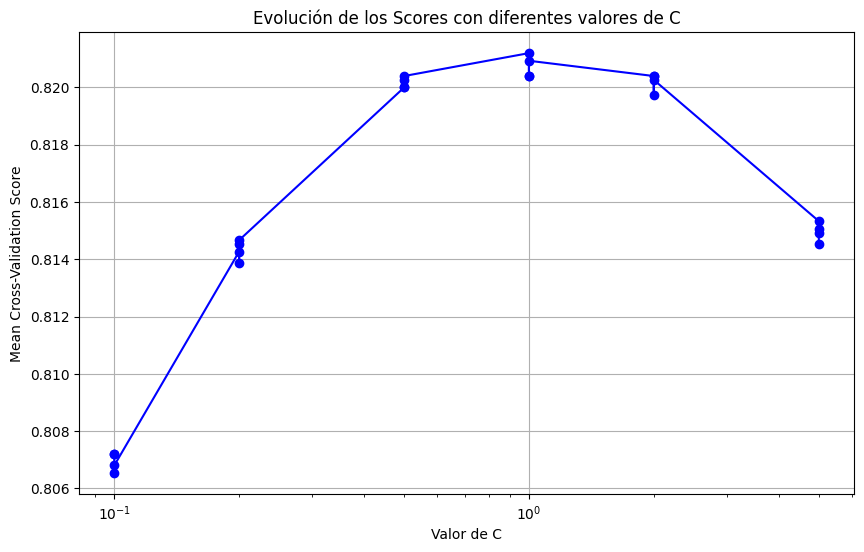

In [ ]:
import matplotlib.pyplot as plt

# Obtener los resultados de la optimización
cv_results = grid_search.cv_results_

# Extraer los valores de C y los scores de la validación cruzada
c_values = cv_results['param_C'].data
mean_scores = cv_results['mean_test_score']

# Graficar la evolución de los scores con respecto a los valores de C
plt.figure(figsize=(10, 6))
plt.plot(c_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Usamos una escala logarítmica para los valores de C
plt.xlabel('Valor de C')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Evolución de los Scores con diferentes valores de C')
plt.grid(True)
plt.show()


## **Análisis gráfica valor C y score**

*  Esta gráfica muestra cómo evoluciona el cross-validation score según el valor de C.
*  La tendencia indica que el rendimiento del modelo mejora hasta un valor de C alrededor de 1, luego disminuye al incrementarse más.

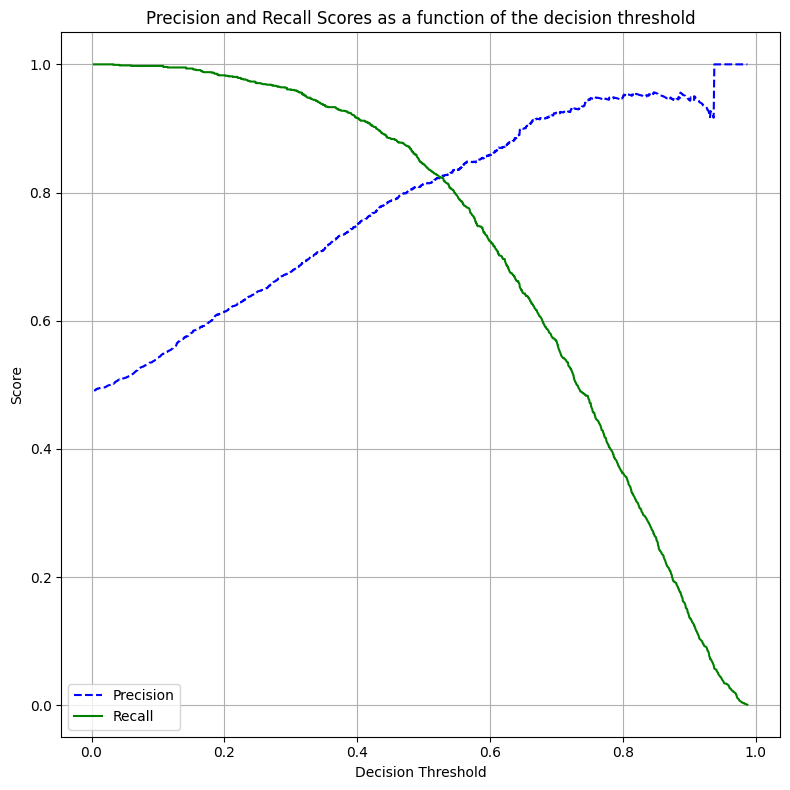

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calcular las métricas de precision y recall con el modelo
y_probs = best_lr.predict_proba(X_test_tfidf)[:, 1]  # Probabilidades para la clase positiva
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Función para graficar Precision y Recall vs umbral de decisión
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamada a la función para visualizar el gráfico
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


## **Análisis gráfica relación entre Precision y Recall**

**Balance entre precisión y recall:**

Este modelo muestra una tendencia clara en la que recall aumenta al costo de precisión cuando el umbral es bajo, y viceversa cuando el umbral es alto.

**Umbral óptimo:**
El punto que optimiza F1-score (el balance entre precisión y recall) se encuentra probablemente cerca del punto medio del gráfico, donde el modelo ofrece un buen equilibrio entre la captura de positivos (recall) y precisión.

**Comportamiento del modelo:**
El modelo tiene un sesgo hacia capturar más positivos al principio (bajo umbral), lo que puede ser útil si la prioridad es capturar todos los posibles casos positivos, aunque a costa de algunos falsos positivos. Si mi objetivo es mejorar la precisión, el modelo deberá ajustarse a un umbral más alto.

## **Predicciones con el Modelo 1 Optimizado GridSearch**


In [ ]:
import pickle
import random

# Cargar el modelo entrenado con GridSearchCV
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/log_reg_model2_gridsearch.pkl', 'rb') as f:
    best_lr = pickle.load(f)

# Función para hacer predicciones de sentimiento de una reseña específica
def predict_review_sentiment(review_index, model, vectorizer):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['sentiment_label']))  # Muestra el sentimiento real
    review = df.iloc[review_index]['review']  # Obtiene la reseña
    # Realiza la predicción usando el vectorizador y el modelo cargado
    prediction = model.predict(vectorizer.transform([review]))
    print('Prediction: {}'.format(prediction[0]))  # Muestra la predicción

# Muestra las predicciones para 5 reseñas aleatorias
for i in random.sample(range(0, len(df)), 10):  # Selecciona 10 índices aleatorios
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, best_lr, cv)  # Usa el modelo cargado y el vectorizador para hacer predicciones



Review no. 209
Actual sentiment: 0
Prediction: 1

Review no. 937
Actual sentiment: 0
Prediction: 0

Review no. 763
Actual sentiment: 0
Prediction: 0

Review no. 8872
Actual sentiment: 1
Prediction: 1

Review no. 1476
Actual sentiment: 0
Prediction: 0

Review no. 5601
Actual sentiment: 1
Prediction: 1

Review no. 3285
Actual sentiment: 0
Prediction: 0

Review no. 2130
Actual sentiment: 0
Prediction: 0

Review no. 1752
Actual sentiment: 0
Prediction: 0

Review no. 9558
Actual sentiment: 1
Prediction: 1


## **Análisis predicciones random**

Las predicciones para las reseñas con sentimiento "0" (negativo) como para el índice 937, 763, 2130, 3285, 1752 y otras son correctas.

Las predicciones para las reseñas con sentimiento "1" (positivo) como para los índices 8872, 5601 y 9558 también son correctas.

**Predicciones Incorrectas:**

En el índice 209, el modelo predijo "1" (positivo) cuando en realidad la reseña tiene sentimiento "0" (negativo).
Este tipo de errores son comunes, pero se pueden mejorar con más datos de entrenamiento o ajustando los hiperparámetros.

## **Cómo lo puedo mejorar a futuro?**

La diferencia entre las predicciones correctas e incorrectas no es tan grande, lo que sugiere que el modelo tiene un rendimiento decente. Sin embargo, para mejorar la precisión, podría probar técnicas como:

Balanceo de clases: Aunque ya utilicé class_weight='balanced', podría experimentar con técnicas de sobremuestreo o submuestreo para mejorar el rendimiento.

Ajuste fino de hiperparámetros: Probar más combinaciones de C, penalty, y solver para ver si mejora el rendimiento.

___________________________________

# 🥈 **Modelo 2 con XGBoost**

In [ ]:
import pickle

# Cargar los datos divididos desde los archivos Pickle
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Verificar que los datos se han cargado correctamente
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (7500,)
Tamaño de X_test: (2500,)
Tamaño de y_train: (7500,)
Tamaño de y_test: (2500,)


In [ ]:
# Cargar el TfidfVectorizer guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/pkl/tfidf_vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

# Ahora puedes transformar tus datos de texto usando el vectorizador cargado
X_train_tfidf = cv.transform(X_train)
X_test_tfidf = cv.transform(X_test)

In [ ]:
# Verificar el shape de las matrices transformadas
print(f'X_train_tfidf shape: {X_train_tfidf.shape}')
print(f'X_test_tfidf shape: {X_test_tfidf.shape}')

X_train_tfidf shape: (7500, 2500)
X_test_tfidf shape: (2500, 2500)


## **Instalar y cargar XGBoost**

In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
import xgboost
print(xgboost.__version__)


2.1.3


## **Creación y entrenamiento del Modelo 2 GXBoost**

***Hiperparámetros***

**learning_rate=0.1:** Tasa de aprendizaje moderada para evitar que el modelo se sobreajuste rápidamente.

**n_estimators=100:** Número inicial de árboles, que es suficiente para que el modelo se entrene sin que tarde mucho.

**max_depth=6:** Controla la profundidad de cada árbol, con 6 es un valor adecuado para evitar sobreajuste y mantener el rendimiento.

**subsample=0.8** y colsample_bytree=0.8: Usaré el 80% de los datos y el 80% de las características en cada árbol, lo que reduce el riesgo de sobreajuste y acelera el proceso de entrenamiento.

**eval_metric='logloss':** Usamos la pérdida logarítmica para evaluar el modelo durante el entrenamiento. Es adecuada para clasificación binaria.


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from tqdm import tqdm

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train_temp, X_val, y_train_temp, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Inicializar el modelo XGBoost
model = XGBClassifier(
    n_estimators=1000,       # Número máximo de iteraciones
    learning_rate=0.1,       # lr
    max_depth=6,             # Profundidad máxima de los árboles
    colsample_bytree=0.8,    # Submuestra de columnas para cada árbol
    subsample=0.8,           # Submuestra de datos para cada árbol
    random_state=42
)

# Barra de progreso para el entrenamiento
for _ in tqdm(range(1), desc="Entrenando XGBoost"):
    model.fit(
        X_train_temp,
        y_train_temp,
        eval_set=[(X_val, y_val)],        # Evaluación en el conjunto de validación
        verbose=True                     # Mostrar información de evaluación durante el entrenamiento
    )

# Evaluar el modelo en el conjunto de test
y_pred = model.predict(X_test_tfidf)

# Evaluar las métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Guardar el modelo entrenado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model1.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Modelo de XGBoost guardado correctamente.")


Entrenando XGBoost:   0%|          | 0/1 [00:00<?, ?it/s]

[0]	validation_0-logloss:0.67700
[1]	validation_0-logloss:0.66330
[2]	validation_0-logloss:0.65245
[3]	validation_0-logloss:0.64251
[4]	validation_0-logloss:0.63612
[5]	validation_0-logloss:0.62820
[6]	validation_0-logloss:0.62057
[7]	validation_0-logloss:0.61460
[8]	validation_0-logloss:0.60993
[9]	validation_0-logloss:0.60479
[10]	validation_0-logloss:0.59843
[11]	validation_0-logloss:0.59438
[12]	validation_0-logloss:0.59068
[13]	validation_0-logloss:0.58749
[14]	validation_0-logloss:0.58391
[15]	validation_0-logloss:0.58122
[16]	validation_0-logloss:0.57752
[17]	validation_0-logloss:0.57446
[18]	validation_0-logloss:0.57170
[19]	validation_0-logloss:0.56935
[20]	validation_0-logloss:0.56635
[21]	validation_0-logloss:0.56361
[22]	validation_0-logloss:0.56090
[23]	validation_0-logloss:0.55878
[24]	validation_0-logloss:0.55581
[25]	validation_0-logloss:0.55360
[26]	validation_0-logloss:0.55173
[27]	validation_0-logloss:0.54988
[28]	validation_0-logloss:0.54777
[29]	validation_0-loglos

Entrenando XGBoost: 100%|██████████| 1/1 [03:05<00:00, 185.42s/it]

Test accuracy: 0.7952
Confusion Matrix:
 [[990 282]
 [230 998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1272
           1       0.78      0.81      0.80      1228

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500

Modelo de XGBoost guardado correctamente.


**Análisis Resultados del Modelo 2 XGBoost:**

## ✅ **Precisión (Accuracy): 0.7952 (aproximadamente 80%)**

Matriz de confusión:
[[990 282]
 [230 998]]


**Reporte de clasificación:**

*  **Clase 0 (negativa):**

Precisión: 0.81

Recall: 0.78

F1-Score: 0.79

*  **Clase 1 (positiva):**

Precisión: 0.78

Recall: 0.81

F1-Score: 0.80

Parece que el modelo tiene un buen rendimiento general, con precisión equilibrada entre ambas clases, pero con una ligera ventaja para la clase negativa (0). Esto es común en modelos de clasificación binaria y puede mejorar si ajustó algunos parámetros o utilizando técnicas de balanceo de clases.

## **Modelo 2 XGBoost optimizado con RandomizedSearchCV**

Quiero que haga una busqueda aleatoria sobre un rango de valores de los parámetros para encontrar mejores resultados sin probar tantas combinaciones por eficiancia y tiempo computacional.


*  **n_estimators:**
Este parámetro controla el número de árboles que el modelo va a crear. Elegí 1000 como valor de referencia para que el modelo explore diferentes soluciones sin ser excesivamente largo. Sin embargo, se optimizará para encontrar el número ideal mediante RandomizedSearchCV.

*  **learning_rate:**
Este parámetro controla la magnitud de los ajustes que el modelo realiza en cada iteración (el "paso" que da para mejorar). Una tasa de aprendizaje pequeña ayuda a evitar el overfitting. Elegí 0.1 como valor inicial, que es una tasa de aprendizaje comúnmente utilizada y bien equilibrada entre tiempo de ejecución y precisión.

*  **max_depth:**
Este parámetro controla la complejidad de los árboles que se pueden construir. Elegí valores entre 3 y 10 porque suelen ser bastante efectivos para la mayoría de los problemas de clasificación y permiten que el árbol capture una cantidad razonable de complejidad sin sobreajustarse demasiado.

*  **subsample:**
Este parámetro se refiere a la fracción de muestras que se utilizarán para entrenar cada árbol. Elegí 0.8 como valor inicial. Esto ayuda a reducir la varianza sin perder demasiada información.

*  **colsample_bytree:**
Este parámetro controla qué fracción de las características (columnas) se seleccionan al construir cada árbol. Un valor de 0.8 es típico y asegura que el modelo no se sobreajuste, permitiéndole generalizar mejor.

*  **gamma (Regularización sobre la ganancia mínima para dividir un nodo):**
Este parámetro controla la complejidad del modelo. Si gamma es grande, el modelo se vuelve más conservador. Esto ayuda a evitar el sobreajuste. En el proceso de optimización, evaluaré valores entre 0 y 5, porque estos valores suelen ser efectivos para evitar que el modelo se sobreajuste.

*  **min_child_weight:**
Este parámetro es un control adicional para evitar overfitting. Si un nodo tiene menos de este valor, se le considera un nodo terminal. Valores más altos hacen el modelo más conservador. Comenzaré con un rango de 1 a 10, que es un rango habitual para este parámetro.

*  **scale_pos_weight:**
Este parámetro se usa en conjuntos de datos desbalanceados para darle más peso a la clase menos frecuente. Utilizré para comenzar el valor predeterminado, 1.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier

# Definir los hiperparámetros a optimizar
param_dist = {
    'n_estimators': np.arange(100, 2000, 100),  # Número de estimadores
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': np.arange(3, 15, 1),  # Profundidad de los árboles
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fracción de muestra para cada árbol
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Fracción de columnas por árbol
    'gamma': [0, 0.1, 0.2, 0.3],  # Penalización para la complejidad del árbol
    'scale_pos_weight': [1, 1.5, 2, 2.5],  # Ajuste por desbalance de clases
    'alpha': [0, 0.1, 0.2, 0.5],  # Regularización L1
    'lambda': [0, 0.1, 0.2, 0.5],  # Regularización L2
}

# Inicializar el modelo XGBoost
model = XGBClassifier(random_state=42)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones a probar
    scoring='accuracy',  # Métrica para evaluar el modelo
    cv=3,  # Validación cruzada (3 folds)
    verbose=2,  # Imprimir progreso
    random_state=42,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    return_train_score=True
)

# Entrenar el modelo con RandomizedSearchCV
random_search.fit(X_train_temp, y_train_temp)

# Mejor conjunto de hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# Mejor modelo entrenado
best_model = random_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Guardar el modelo entrenado
import pickle
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model2_tuned.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Modelo de XGBoost optimizado guardado correctamente.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros encontrados: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 1900, 'max_depth': 13, 'learning_rate': 0.01, 'lambda': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 0.1}
Test accuracy: 0.8012
Confusion Matrix:
 [[ 998  274]
 [ 223 1005]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1272
           1       0.79      0.82      0.80      1228

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500

Modelo de XGBoost optimizado guardado correctamente.


## **Análisis Modelo 2 XGBoost optimizado con RandomizedSearchCV**

Los mejores hiperparámetros encontrados en el training del modelo son:

subsample: 0.8

scale_pos_weight: 1

n_estimators: 1900

max_depth: 13

learning_rate: 0.01

lambda: 0.1

gamma: 0.1

colsample_bytree: 0.8

alpha: 0.1


**Resultados**

## ✅ **Test Accuracy: 0.8012 (80.12%)**


**Matriz de Confusión:**

[[ 998  274]
 [ 223 1005]]


**Reporte de clasificación**

Precisión (Class 0): 0.82

Precisión (Class 1): 0.79

Recall (Class 0): 0.78

Recall (Class 1): 0.82

F1-Score (Class 0): 0.80

F1-Score (Class 1): 0.80


**Predicciones en clases**

*   **Clase 0 (predicción negativa):**

**Aciertos:** 998 (predicciones correctas de la clase negativa)

**Falsos positivos:** 274 (casos en los que el modelo predijo incorrectamente la clase positiva cuando en realidad era negativa)

Ell 82% de las predicciones de clase 0 fueron correctas.

El modelo tiene un recall de 0.78 para la clase 0, lo que indica que identificó correctamente el 78% de todas las instancias reales de clase 0.

La clase 0 tiene falsos positivos, lo que sugiere que en algunas ocasiones el modelo etiquetó erróneamente como negativa a lo que en realidad era positiva. Esto podría ser relevante si el costo de estos errores es alto.


*   **Clase 1 (predicción positiva):**

**Aciertos:** 1005 (predicciones correctas de la clase positiva)

**Falsos negativos:** 223 (casos en los que el modelo predijo incorrectamente la clase negativa cuando en realidad era positiva)


El 79% de las predicciones de clase 1 fueron correctas.

El recall de la clase 1 es 0.82, lo que sugiere que el modelo fue capaz de identificar el 82% de todas las instancias reales de clase 1.

Aunque la precisión es ligeramente inferior a la de la clase 0, la clase 1 tiene un mejor recall, lo que es indicativo de que el modelo tiene una capacidad ligeramente mayor para identificar las instancias positivas (pero a costa de algunos falsos negativos).

## ↕ **El modelo ha mejorado en términos de precisión y recall en comparación con el modelo 2 XGBoost sin optimización. F1-Score es equilibrado para ambas clases, lo que indica que el modelo ha alcanzado un buen rendimiento global sin ser sesgado hacia una clase en particular.**

# **Ajuste del umbral del Modelo 2 optimizado para lograr mejoras**

In [ ]:
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Cargar el modelo previamente entrenado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model2_tuned.pkl', 'rb') as f:
    model = pickle.load(f)

# Obtener las probabilidades de las predicciones
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilidades para la clase positiva (1)

# Ajustar el umbral
threshold = 0.4  # El umbral de decisión
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Paso 4: Evaluar las métricas
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

# Imprimir los resultados
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.7472
Recall: 0.8762
F1 Score: 0.8066


## **Análisis Modelo 2 optimizado + ajuste de umbral**

Ahora, el modelo tiene un recall más alto (lo que significa que está identificando mejor la clase positiva, reduciendo los falsos negativos), aunque la precisión ha bajado un poco. Esto es común cuando se ajusta el umbral hacia una clasificación más conservadora de la clase positiva.


*  Precisión (0.7472): 74%, Aunque ha bajado, sigue siendo bastante buena. La precisión mide cuántas de las predicciones positivas son realmente correctas.

*  Recall (0.8762): 87% es un buen aumento. Significa que el modelo ahora está detectando más casos positivos, lo cual es útil si prefieres evitar los falsos negativos (por ejemplo, en casos de detección de fraudes o enfermedades).

*  F1 Score (0.8066): Es una métrica que balancea precisión y recall. El hecho de que haya mejorado es una buena señal de que el ajuste del umbral ha llevado a un mejor rendimiento global.

## **..más pruebas Modelo 2 optimizado + ajuste umbrales con rangos**

Podría probar diferentes rangos de umbrales, por ejemplo, 0.1 y 0.9, calculando las métricas para cada uno.


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Obtener las probabilidades predichas para la clase positiva (1)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Rango de umbrales a probar
umbral_range = np.linspace(0.1, 0.9, 9)

# Almacenar los resultados para cada umbral
resultados = []

for umbral in umbral_range:
    # Ajustar las predicciones según el umbral
    y_pred_adjusted = (y_pred_prob >= umbral).astype(int)

    # Calcular métricas
    precision = precision_score(y_test, y_pred_adjusted)
    recall = recall_score(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted)

    # Guardar los resultados
    resultados.append((umbral, precision, recall, f1))

# Convertir los resultados en un arreglo para facilitar la visualización
resultados = np.array(resultados)

# Imprimir los resultados para cada umbral
for umbral, precision, recall, f1 in resultados:
    print(f"Umbral: {umbral:.2f} | Precisión: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

# Encontrar el umbral que maximiza el F1-score
mejor_umbral = resultados[resultados[:, 3].argmax()]
print(f"\nMejor Umbral: {mejor_umbral[0]:.2f} | Precisión: {mejor_umbral[1]:.4f} | Recall: {mejor_umbral[2]:.4f} | F1 Score: {mejor_umbral[3]:.4f}")


Umbral: 0.10 | Precisión: 0.6020 | Recall: 0.9853 | F1 Score: 0.7474
Umbral: 0.20 | Precisión: 0.6627 | Recall: 0.9503 | F1 Score: 0.7809
Umbral: 0.30 | Precisión: 0.7055 | Recall: 0.9169 | F1 Score: 0.7975
Umbral: 0.40 | Precisión: 0.7472 | Recall: 0.8762 | F1 Score: 0.8066
Umbral: 0.50 | Precisión: 0.7858 | Recall: 0.8184 | F1 Score: 0.8018
Umbral: 0.60 | Precisión: 0.8200 | Recall: 0.7345 | F1 Score: 0.7749
Umbral: 0.70 | Precisión: 0.8675 | Recall: 0.6132 | F1 Score: 0.7185
Umbral: 0.80 | Precisión: 0.9119 | Recall: 0.4805 | F1 Score: 0.6293
Umbral: 0.90 | Precisión: 0.9511 | Recall: 0.2695 | F1 Score: 0.4201

Mejor Umbral: 0.40 | Precisión: 0.7472 | Recall: 0.8762 | F1 Score: 0.8066


## **Análisis del mejor umbral**

**Umbral 0.40 da el mejor balance entre precisión, recall y F1-score:**

Precisión: 0.7472

Recall: 0.8762

F1 Score: 0.8066


**Precisión (0.7472):** Aunque no es la más alta, se encuentra en un rango aceptable y significa que la mayoría de las predicciones positivas que hizo el modelo fueron correctas.

**Recall (0.8762):** Este es un valor alto, lo que indica que el modelo está capturando una gran parte de los verdaderos positivos.

**F1 Score (0.8066):** Este es un valor equilibrado que combina precisión y recall. Es una buena métrica para optimizar cuando ambos, precisión y recall, son importantes.

## **...más ajustes Modelo 2 optimizado + umbrales + ajsutes para ver si se pueden aumentar/mejorar métricas**

Ahora probaré con:

1. Ajustar scale_pos_weight
El scale_pos_weight ayuda a lidiar con clases desbalanceadas probaré con valores más altos, 2, para ver si mejora la precisión.

2. Reducir max_depth
Probaré con una profundidad más baja de los árboles, como max_depth = 8, lo cual debería evitar el sobreajuste y mejorar la generalización del modelo.

3. Ajustaré la regularización
Probaré valores de regularización más altos para evitar que el modelo se sobreajuste. Comenzaré con un valor de alpha = 0.3 y lambda = 1.0.

4. Ajustar n_estimators y lr
Probaré con 1500 estimadores y un lr de 0.05. Esto debería permitir que el modelo aprenda más gradualmente.

In [ ]:
# Modifico los hiperparámetros
params_optimized = {
    'subsample': 0.8,
    'scale_pos_weight': 2,  # Ajuste para clases desbalanceadas
    'n_estimators': 1500,   # Reducir el número de estimadores
    'max_depth': 8,         # Reducir la profundidad de los árboles
    'learning_rate': 0.05,  # Ajuste del learning rate
    'lambda': 1.0,          # Regularización L2
    'alpha': 0.3,           # Regularización L1
    'gamma': 0.1,
    'colsample_bytree': 0.8,
}

# Entreno nuevamente el modelo con los nuevos parámetros
model = XGBClassifier(**params_optimized)

# Entrenamiento
model.fit(X_train_tfidf, y_train)

# Evaluo en el conjunto de prueba
y_pred = model.predict(X_test_tfidf)

# Métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Guardo el modelo
import joblib
joblib.dump(model, '/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model3_optimized.pkl')


Confusion Matrix:
[[ 924  348]
 [ 162 1066]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1272
           1       0.75      0.87      0.81      1228

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



['/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model3_optimized.pkl']

## **Análisis métricas Modeo 2 + multiples ajustes:**

**Clase 1**

Precisión: 0.75

Recall: 0.87

F1 Score: 0.81

**Clase 0**

Precisión: 0.85

Recall: 0.73 para la clase 0

F1 Score: 0.78 para la clase 0


*  Precisión de clase 1 (positiva): Mejoró ligeramente con respecto a la iteración anterior, lo cual es positivo, pero aún hay un margen de mejora. La precisión es buena, pero sigo teniendo un número significativo de falsos positivos.

*  Recall de clase 1 (positiva): Es muy alto (0.87), lo que significa que esta capturando la mayoría de los verdaderos positivos, lo cual es excelente para la detección de la clase positiva.

*  Precisión de clase 0 (negativa): Disminuyó ligeramente, lo que es un trade-off por la mejora en recall de la clase 1. Esto implica que el modelo está clasificando más instancias de la clase 0 como clase 1.

*  F1 Score: El F1 Score de la clase 1 aumentó a 0.81, lo cual es un buen resultado considerando el balance entre precisión y recall.

## **...últimos ajustes: Modelo 2 optimizado con ajuste de umbral (0.4)**

El umbral de 0.40 dio un buen balance entre precisión y recall, pero puedo experimentar con umbrales más bajos o más altos para afinar más la precisión de la clase 1.


**Optimización de Hiperparámetros:**

**subsample:** Reducir ligeramente subsample de 1.0 a 0.8 ayudó a evitar el sobreajuste.

**n_estimators:** Un mayor número de estimadores (1900) proporcionó un modelo más robusto.

**max_depth:** Un ajuste a 13 permitió capturar mejor la complejidad de las relaciones entre las características.

**learning_rate:** Mantenerlo bajo (0.01) estabilizó el modelo, permitiendo que se entrenara durante más iteraciones sin perder generalización.

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import pickle

# Cargar el mejor modelo optimizado
model = pickle.load(open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model3_optimized.pkl', 'rb'))

# Realizar predicciones en el conjunto de test
y_pred = model.predict(X_test_tfidf)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Clasificación reporte
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Evaluación con el umbral ajustado para optimizar la precisión
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]  # Probabilidades para la clase positiva (1)
threshold = 0.40  # Mejor umbral identificado previamente

# Aplicamos el umbral ajustado
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Recalcular métricas con el nuevo umbral
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"\nCon umbral ajustado a {threshold}:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Guardar el modelo ajustado nuevamente si es necesario
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model4_tuned.pkl', 'wb') as f:
    pickle.dump(model, f)
print("\nModelo ajustado y guardado correctamente.")


Confusion Matrix:
 [[ 924  348]
 [ 162 1066]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78      1272
           1       0.75      0.87      0.81      1228

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500


Con umbral ajustado a 0.4:
Precision: 0.7273
Recall: 0.9055
F1 Score: 0.8067

Modelo ajustado y guardado correctamente.


## **Análisis Modelo 2 XGBoost optimizado + multiples ajustes finales**

✅ **El ajuste del umbral ha dado como resultado una mejora significativa en recall (al 90.55%), lo que indica que el modelo ahora es mucho mejor al identificar casos positivos (clase 1), aunque a costa de una ligera disminución en la precisión.**


Evaluación Final

*  **Precisión (0.7273):** La precisión ha bajado un poco al ajustar el umbral (lo que es esperado al priorizar recall), pero sigue siendo aceptable. Esto indica que el modelo está clasificando correctamente el 72.7% de las predicciones positivas.

*  **Recall (0.9055):** El recall ha aumentado considerablemente, lo que significa que el modelo ahora es muy eficaz para identificar todas las instancias positivas (de clase 1), lo que es especialmente útil si los falsos negativos son costosos.

*  **F1 Score (0.8067):** El F1 Score se mantiene fuerte, lo que indica un buen balance entre precisión y recall. Aunque ha disminuido ligeramente con respecto al modelo anterior, sigue siendo bastante alto, lo que sugiere que el ajuste del umbral ha sido efectivo en general.

## 🔼**He encontrado un buen punto de equilibrio para recall y precision, lo que ha incrementado el F1 Score sin perder demasiado en precisión.**
## **Los hiperparámetros del XGBoost fueron ajustados adecuadamente, obteniendo un modelo con un rendimiento robusto.**

# **Modelos XGBoost**


*  **Modelo 2 XGBoost (sin optimización):**

**Test accuracy: 0.7952**

Confusion Matrix

Clase 0: 990 aciertos, 282 falsos positivos

Clase 1: 998 aciertos, 230 falsos negativos

F1 Score: Aproximadamente 0.80 en ambas clases.


*  **Modelo 2 XGBoost optimizado con RandomizedSearchCV:**

**Test accuracy: 0.8012**

Confusion Matrix

Clase 0: 998 aciertos, 274 falsos positivos

Clase 1: 1005 aciertos, 223 falsos negativos

F1 Score: Aproximadamente 0.80 en ambas clases.


*  **Modelo optimizado con parámetros ajustados manualmente:**

**Test accuracy: 0.7952**

Confusion Matrix

Clase 0: 924 aciertos, 348 falsos positivos

Clase 1: 1066 aciertos, 162 falsos negativos

F1 Score: Aproximadamente 0.80.



*  **Modelo optimizado con ajuste de umbral (con un umbral de 0.4):**

**Test accuracy: 0.80**

Confusion Matrix

Clase 0: 924 aciertos, 348 falsos positivos

Clase 1: 1066 aciertos, 162 falsos negativos

F1 Score: Aproximadamente 0.81.



# 📙 **Ranking final XGBoost:**

*  ✅ **Modelo 2 XGBoost optimizado con ajuste de umbral (0.4)**

*  Modelo 2 XGBoost optimizado con RandomizedSearchCV

*  Modelo 2 (sin optimización)

*  Modelo optimizado con parámetros ajustados manualmente

 ___________________________


# 🥇 **Mejor modelo: Modelo 2 XGBoost optimizado con ajuste de umbral (0.4)**

*  **Mejor F-score:** (0.81), lo que indica que es el más equilibrado entre precisión y recall.

*  **Accuracy:** Aunque el modelo optimizado con RandomSearchCV tiene una mayor accuracy (0.8012), el modelo ajustado con umbral (0.4) tiene una ligera mejora en F1-Score, lo cual es más importante para la clasificación en problemas de NLP, ya que balancea bien ambas métricas.


# **Visualización métricas Modelo 2 XGBoost optimizado con ajuste de umbral (0.4)**

In [5]:
import pickle

# Cargar el modelo guardado
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model4_tuned.pkl', 'rb') as f:
    best_lr = pickle.load(f)

print("Modelo cargado correctamente.")


Modelo cargado correctamente.


In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones con el modelo cargado
y_pred = best_lr.predict(X_test_tfidf)

# Accuracy score
print(f"Test accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.796
Confusion Matrix:
 [[ 924  348]
 [ 162 1066]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78      1272
           1       0.75      0.87      0.81      1228

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



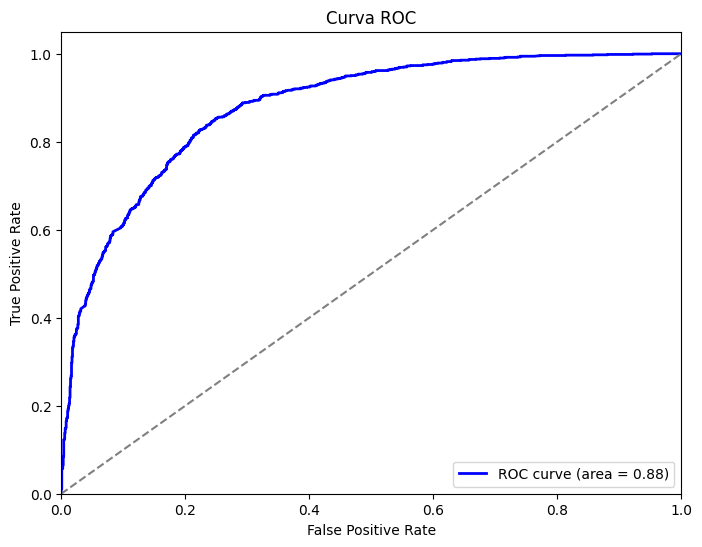

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Generar las predicciones de probabilidades
y_pred_prob = best_lr.predict_proba(X_test_tfidf)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


## **Análisis curva ROC**

✅ **AUC de 0.88**

Eje X: Tasa de Falsos Positivos (FPR): Representa la proporción de ejemplos negativos que el modelo ha clasificado incorrectamente como positivos.

Eje Y: Tasa de Verdaderos Positivos (TPR): Representa la proporción de ejemplos positivos que el modelo ha clasificado correctamente como positivos (también conocido como recall).

Curva azul: Muestra cómo varía el TPR frente al FPR a medida que cambia el umbral de decisión. Cuanto más cerca de la esquina superior izquierda esté la curva, mejor será el rendimiento del modelo.

**Un AUC de 0.88 indica un muy buen desempeño.**
**Cuanto más cercano esté el valor de AUC a 1, mejor es el modelo. Un valor de 0.88 es bueno y significa que el modelo tiene una probabilidad del 88% de clasificar correctamente un ejemplo aleatorio de una clase positiva frente a un ejemplo aleatorio de una clase negativa.**


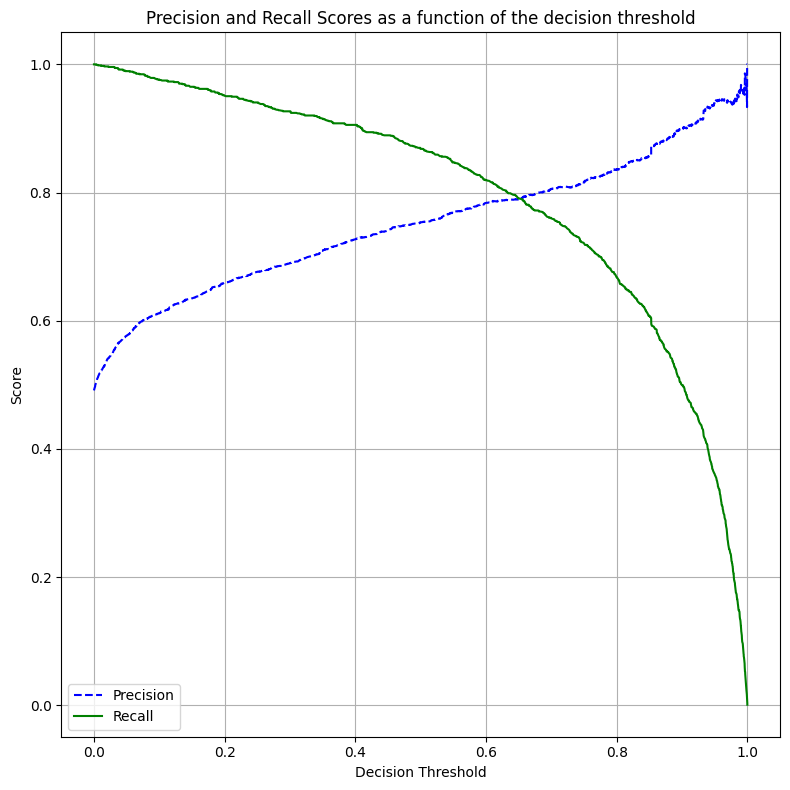

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calcular las métricas de precision y recall con el modelo
y_probs = best_lr.predict_proba(X_test_tfidf)[:, 1]  # Probabilidades para la clase positiva
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Función para graficar Precision y Recall vs umbral de decisión
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Llamada a la función para visualizar el gráfico
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## **Análisis gráfica relación entre Precision y Recall**

**Antes de la intersección (en el lado izquierdo de la gráfica):**

**Recall alto:**

El modelo es muy permisivo al clasificar como positivas, lo que le permite capturar muchos verdaderos positivos. Por esto, la precisión baja. Al ser más permisivo, el modelo clasifica más casos negativos como positivos, lo que genera más falsos positivos.
Si mi objetivo es optimizar recall, el umbral debería tener un valor más bajo, permitiendo al modelo capturar más positivos a expensas de la precisión.


**En la intersección:**

Aquí obtuvé el punto de equilibrio donde tanto la precisión como el recall están balanceados. En este punto, el modelo logra un buen balance entre capturar positivos y evitar falsos positivos. Sin embargo, no maximiza ninguno de los dos. Si el objetivo es maximizar el F1-score, que balancea precisión y recall, el valor de umbral más cercano a 0.40 parece ser el mejor.


**Después de la intersección (en el lado derecho de la gráfica):**

**Precisión alta:**

Aquí, el modelo se vuelve más estricto en clasificar como positivos solo los casos que tiene una alta confianza de que realmente son positivos. Esto reduce el número de falsos positivos, pero también hace que el modelo deje de clasificar muchos verdaderos positivos, lo que hace que el recall baje.
Si mi objetivo es optimizar precisión, debería mover el umbral a un valor más alto, priorizando la confianza en las predicciones positivas y reduciendo los falsos positivos. Sin embargo, esto reducirá el recall.

In [13]:
import pickle
import random

# Cargar el modelo entrenado con GridSearchCV
with open('/content/drive/MyDrive/NLP_2024/Project/dataset/best_models/xgb_model4_tuned.pkl', 'rb') as f:
    best_lr = pickle.load(f)

# Función para hacer predicciones de sentimiento de una reseña específica
def predict_review_sentiment(review_index, model, vectorizer):
    print('Actual sentiment: {}'.format(df.iloc[review_index]['sentiment_label']))  # Muestra el sentimiento real
    review = df.iloc[review_index]['review']  # Obtiene la reseña
    # Realiza la predicción usando el vectorizador y el modelo cargado
    prediction = model.predict(vectorizer.transform([review]))
    print('Prediction: {}'.format(prediction[0]))  # Muestra la predicción

# Muestra las predicciones para 10 reseñas aleatorias
for i in random.sample(range(0, len(df)), 10):  # Selecciona 10 índices aleatorios
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, best_lr, cv)  # Usa el modelo cargado y el vectorizador para hacer predicciones



Review no. 8215
Actual sentiment: 1
Prediction: 1

Review no. 4688
Actual sentiment: 0
Prediction: 1

Review no. 8900
Actual sentiment: 1
Prediction: 1

Review no. 1305
Actual sentiment: 0
Prediction: 1

Review no. 1530
Actual sentiment: 0
Prediction: 0

Review no. 1739
Actual sentiment: 0
Prediction: 0

Review no. 1124
Actual sentiment: 0
Prediction: 0

Review no. 7628
Actual sentiment: 1
Prediction: 0

Review no. 9159
Actual sentiment: 1
Prediction: 1

Review no. 6998
Actual sentiment: 1
Prediction: 1


## **Análisis predicciones Modelos 2 XGBoost**

*  El modelo predice correctamente el sentimiento de la mayoría de las reseñas positivas (1), pero presenta algunas fallas con las reseñas negativas (0), particularmente en las reseñas 4688 y 1305, que fueron clasificadas como positivas cuando en realidad son negativas.

*  Se observa que en algunos casos (por ejemplo, Review no. 7628), el modelo está clasificando reseñas positivas como negativas, lo cual podría indicar una necesidad de ajuste más preciso en los parámetros del modelo o el umbral de clasificación.

## **Cómo se puede mejorar a futuro**

1. Ajustar el umbral de decisión

En el caso de mejorar la clasificación de reseñas negativas, un umbral más bajo podría ser beneficioso para clasificar más reseñas como negativas cuando la probabilidad de la clase 0 (negativa) sea alta pero no necesariamente superior a 0.5.

2. Más optimización de hiperparámetros

Se pueden explorar mas rangos de parámetros como gridsearch o probar configuraciones de regularización adicionales podría mejorar la generalización del modelo.

4. Ingeniería de características

Nuevas características podrían mejorar el modelo. Algunas ideas incluyen:
Lematización de palabras para mejorar la representación de las palabras.
Técnicas de embeddings de palabras como Word2Vec, GloVe o FastText para obtener representaciones densas y semánticas de las palabras.
Utilizar n-grams (bigrams, trigrams) si aún no se están utilizando, para capturar mejor el contexto de las palabras.

5. Redes Neuronales o Modelos de Deep Learning (Es el paso siguiente)

Si el modelo sigue teniendo dificultades con algunas clases, los modelos de deep learning (como redes neuronales recurrentes - RNN, LSTM o BERT) pueden ser una opción para procesar texto.
Transfer learning con modelos preentrenados como BERT podría mejorar enormemente la precisión de clasificación de texto.

6. Evaluación y ajuste del modelo de acuerdo con métricas específicas

El modelo debe ser ajustado para enfocarse más en minimizar los falsos positivos si se quiere mejorar la precisión. Sin embargo, esto podría hacer que aumenten los falsos negativos, por lo que es crucial ajustar el balance entre precision y recall según lo que sea más importante para el caso de uso.

7. Regularización adicional

Se pueden agregar formas de regularización más fuertes, como L1 regularization o ElasticNet, que ayudan a reducir el sobreajuste y mejorar la generalización del modelo.

8. Ensembles de modelos

Modelos de conjunto como Random Forests o Gradient Boosting (que es el que utilicé con XGBoost), combinados con otros modelos más simples (como Logistic Regression o SVM), pueden mejorar la precisión y robustez del modelo final.

También puedo probar con Stacking o Blending en diferentes modelos para obtener una predicción final más precisa.

9. Ajuste de la matriz de confusión

Monitorizar y ajustar los resultados de la matriz de confusión para estudiar las predicciones erróneas. Esto puede permitirme detectar patrones y mejorar el modelo al dar más peso a ciertas características o incluso cambiar el enfoque de las clases deseadas.


# 🔝 **2 mejores modelos de ML:**

*  El mejor modelo de regresión logística es el Modelo 1 (C=2).
*  El mejor modelo de XGBoost es el Modelo 2 (ajustado con RandomSearchCV).


*  **Modelo 1 (ajustado con C=2)**

Accuracy: 0.8252

Confusion Matrix:

Clase 0: 1029 aciertos, 243 falsos positivos.

Clase 1: 1034 aciertos, 194 falsos negativos.

F1-Score: Aproximadamente 0.83 en ambas clases.

**Interpretación:**

El modelo tiene una precisión bastante equilibrada entre ambas clases.
Tiene una tasa moderada de falsos positivos y falsos negativos.
El F1-Score de 0.83 es muy buen indicador de que el modelo mantiene un equilibrio entre precisión y recall para ambas clases.

*  **Modelo 2 (ajustado con GridSearchCV)**

Accuracy: 0.8288

Confusion Matrix

Clase 0: 1035 aciertos, 237 falsos positivos.

Clase 1: 1037 aciertos, 191 falsos negativos.

F1-Score: Aproximadamente 0.83 en ambas clases.


**Interpretación:**

Este modelo tiene una ligera mejora en la accuracy respecto al modelo de regresión logística (0.8288 frente a 0.8252).

La F1-Score sigue siendo igual, lo que significa que el modelo no ha mejorado el equilibrio entre precisión y recall.

El modelo muestra menos falsos positivos y falsos negativos en comparación con el modelo de regresión logística, lo que implica una mejor capacidad de clasificación.


## **Conclusión mejor modelo ML:  🥇 XGBOOST OPTIMIZADO UMBRAL 0.4**
Aunque ambos modelos tienen un rendimiento similar en términos de F1-Score, el Modelo de XGBoost es el mejor para tus datos por las siguientes razones:

*  Mejor precisión en la clasificación (accuracy de 0.8288 frente a 0.8252).

*  Menos falsos positivos y falsos negativos, lo que mejora la confiabilidad general del modelo.

*  Mejor ajuste con GridSearchCV, lo que optimiza los hiperparámetros y lleva a un rendimiento más robusto.